# Data Analysis Assignment 2

## Part One: Exploring Data and Testing Hypotheses: Uncovering Insights from Dataset

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from math import sqrt
from scipy.stats import shapiro
from scipy.stats import skew

### Task 1: Data Preparation and Exploration (5 marks)

<b>Importing Data

In [2]:
# Read CSV
df = pd.read_csv("Employee_Performance.csv")

In [3]:
df.head()

,EmployeeID,Department,Gender,Experience,TrainingHours,PerformanceRating,Salary
0,1001,IT,Male,4,5,1.00,19000
1,1002,Marketing,Female,0,50,5.50,6900
2,1003,Sales,Male,0,5,1.00,6000
3,1004,HR,Male,1,5,1.00,6000
4,1005,HR,Female,9,5,1.04,38000


<b> Summary Statistics

In [4]:
df.describe()

,EmployeeID,Experience,TrainingHours,PerformanceRating,Salary
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,1734.500000,2.838556,32.144414,3.561512,16107.623297
std,423.919411,2.527657,10.106029,1.044987,12158.438481
min,1001.000000,0.000000,5.000000,1.000000,6000.000000
25%,1367.750000,1.000000,25.000000,2.840000,7700.000000
50%,1734.500000,2.000000,31.000000,3.630000,10100.000000
75%,2101.250000,4.000000,39.000000,4.330000,20000.000000
max,2468.000000,9.000000,50.000000,5.500000,53100.000000


<b> Distribution/Skew

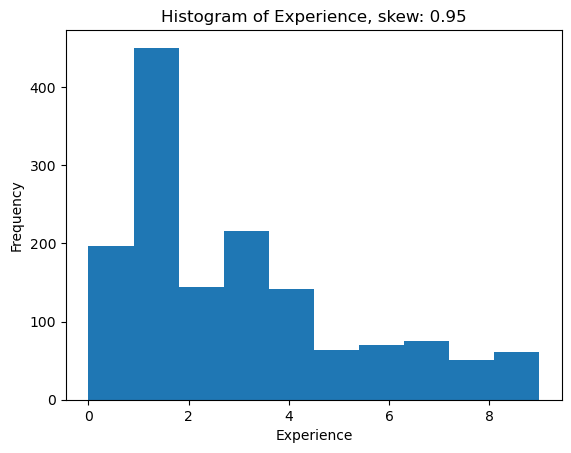

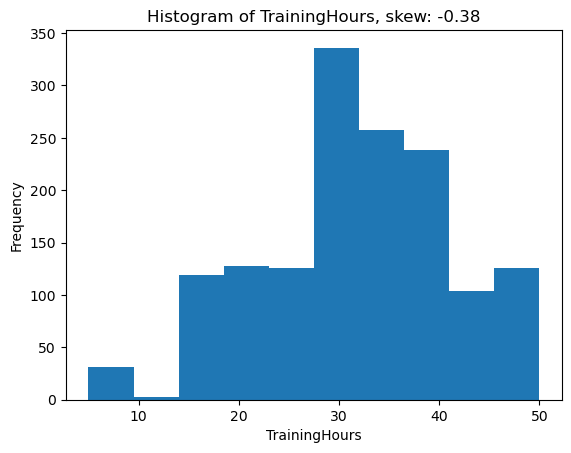

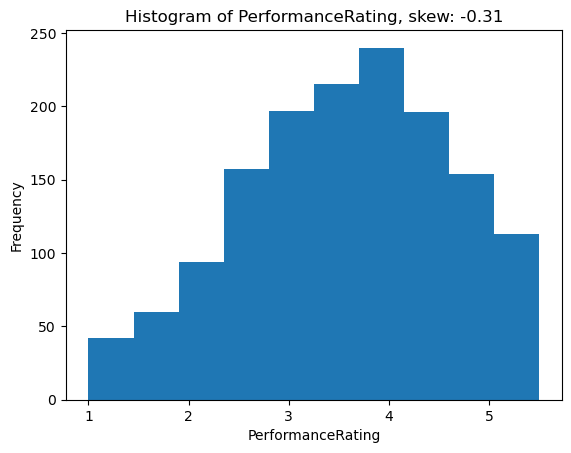

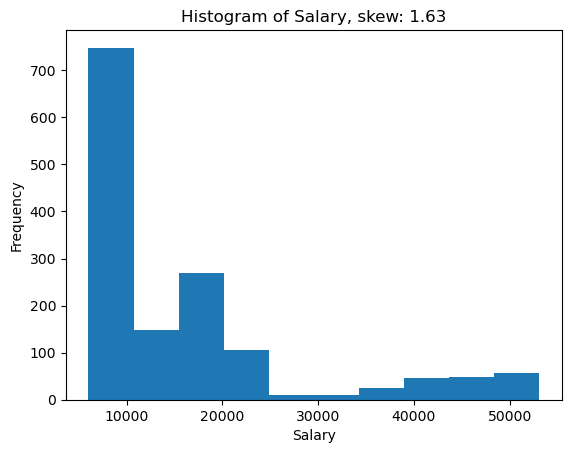

In [5]:
# Data Distribution
numerical_columns = ['Experience', 'TrainingHours', 'PerformanceRating', 'Salary']
for column in numerical_columns:
    skewness = df[column].skew()    
    # Plot
    plt.hist(df[column].dropna(), bins=10)
    plt.title(f'Histogram of {column}, skew: {round(skewness, 2)}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

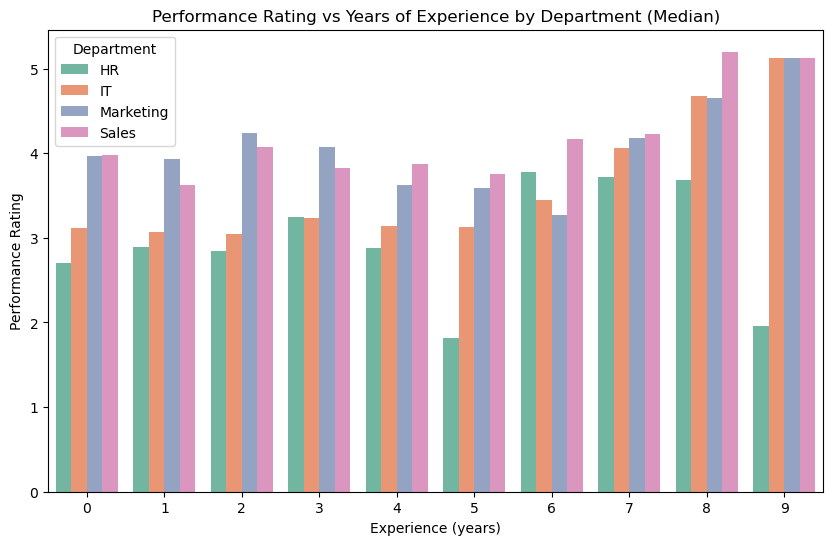

In [6]:
grouped_data = df.groupby(['Department','Experience'])['PerformanceRating'].median().reset_index()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Experience', y='PerformanceRating', hue='Department', data=grouped_data, palette='Set2')
plt.xlabel('Experience (years)')
plt.ylabel('Performance Rating')
plt.title('Performance Rating vs Years of Experience by Department (Median)')
plt.show()

### Task 3: Statistical Technique: Hypothesis Testing (20 marks)

Statistical Method - ANOVA

In [7]:
# Perform a one way ANOVA test
department_values = df['Department'].unique()
grouped_data = [df[df['Department'] == department]['PerformanceRating'] for department in department_values]
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Variable to store Department Counts
department_counts = {}

# Loop through unique department values
for department in df['Department'].unique():
    # Count the occurrences of the current stream and store it in the dictionary
    count = len(df[df['Department'] == department])
    department_counts[department] = count

# Print the department counts
for department, count in department_counts.items():
    print(f"Department {department}: {count} observations")

alpha = 0.05
    
df_between = len(department_values) - 1
df_within = len(df) - len(department_values)

# Calculate the critical F-value based on alpha and degrees of freedom
critical_f_value = stats.f.ppf(1 - alpha, df_between, df_within)

# Print the results
print(f"\nOne-way ANOVA Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"Critical F-value: {critical_f_value:.2f}")
print(f"P-value: {p_value:.40f}")
print(f"Confidence Level: 0.05")

Department IT: 720 observations
Department Marketing: 240 observations
Department Sales: 445 observations
Department HR: 63 observations

One-way ANOVA Results:
F-statistic: 61.45
Critical F-value: 2.61
P-value: 0.0000000000000000000000000000000000002017
Confidence Level: 0.05


## Part Two: Regression Analysis

### Task 2: Assumptions for Regression Analysis (10 marks)

In [8]:
data = df[['Experience', 'TrainingHours', 'PerformanceRating', 'Salary', 'Department']]

C:\Users\Gorilla Rig\AppData\Local\Temp\ipykernel_5272\822732047.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


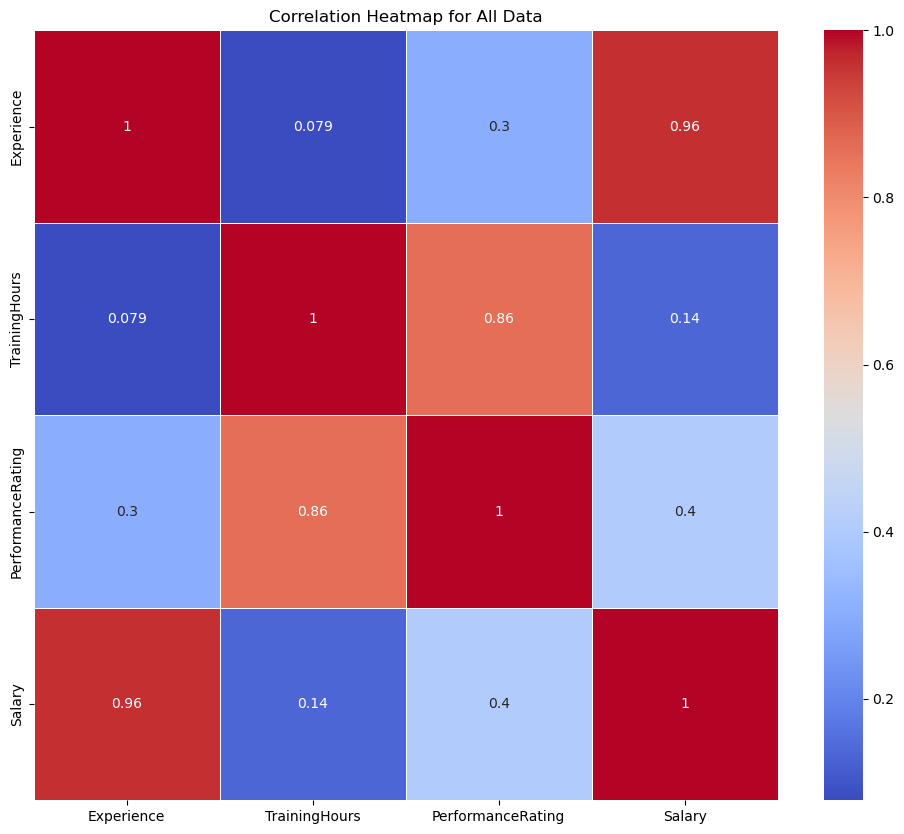

In [9]:
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for All Data')
plt.show()

In [10]:
# Select independent variables
X = data[['Experience', 'TrainingHours', 'Salary', 'Department']]
y = data['PerformanceRating']

C:\Users\Gorilla Rig\AppData\Local\Temp\ipykernel_5272\2561315871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X.corr()


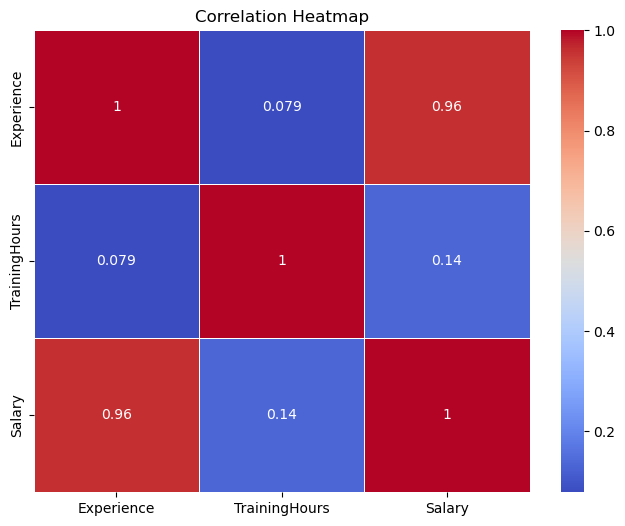

In [11]:
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
X = data[['TrainingHours', 'Salary', 'Department']]

### Task 3: Regression Analysis (10 marks)

In [13]:
y = data['PerformanceRating']
#Create the linear regression model
import statsmodels.api as sm
X = pd.get_dummies(data[['TrainingHours', 'Salary', 'Department']], 
                   columns=['Department'], drop_first=True)
#Add a constant term (intercept) to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      PerformanceRating   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1414.
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:40:43   Log-Likelihood:                -852.27
No. Observations:                1468   AIC:                             1717.
Df Residuals:                    1462   BIC:                             1748.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2472 

### Task 4: Assumptions of Linear Regression (10 marks)

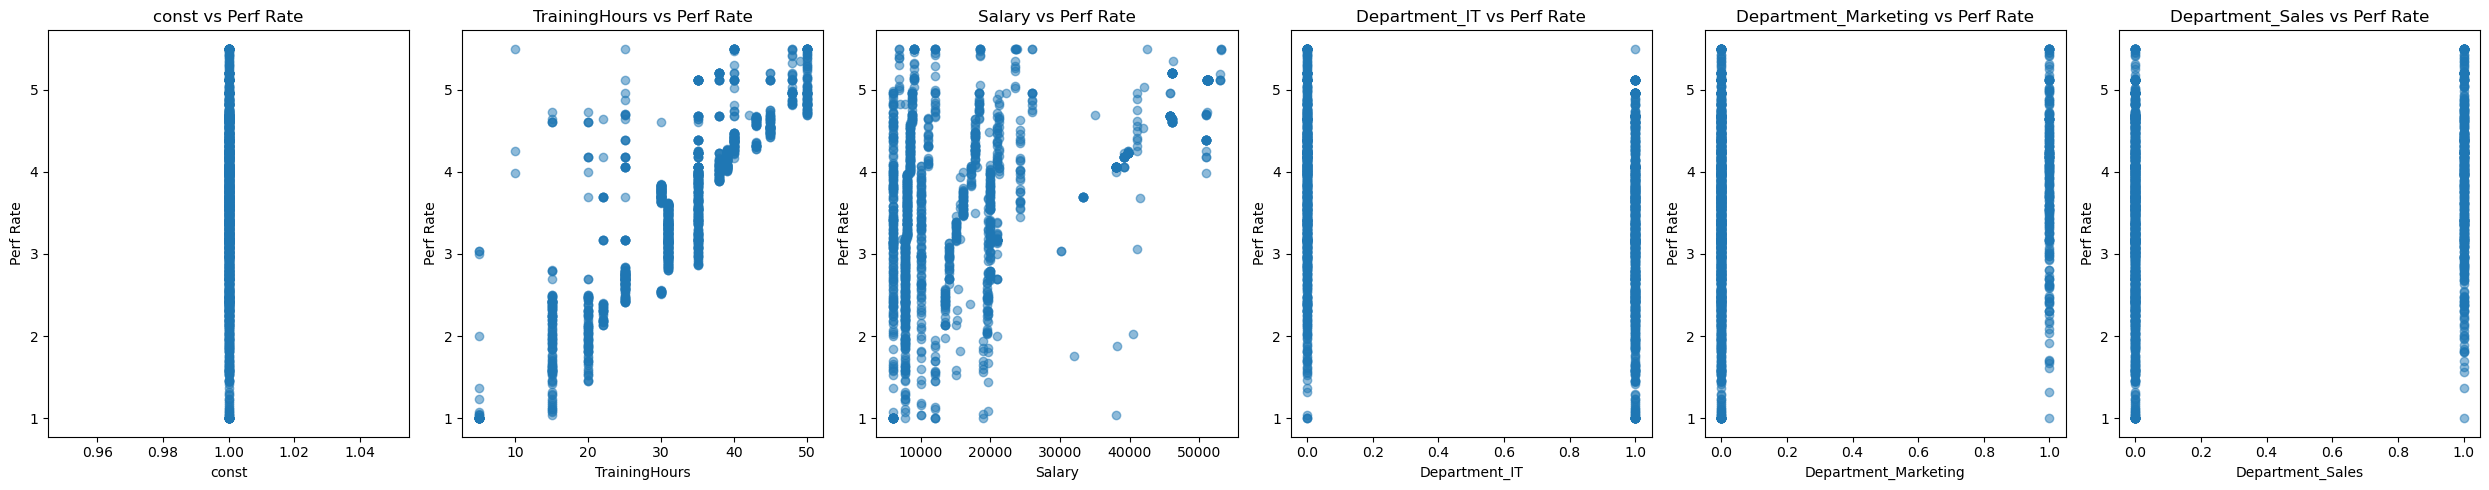

In [28]:
# Step 3.2: Create scatterplots for each independent variable against the dependent variable
fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(25, 5))

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], y, alpha=0.5)
    axes[i].set_title(f'{col} vs Perf Rate')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Perf Rate')

plt.tight_layout()
plt.show()

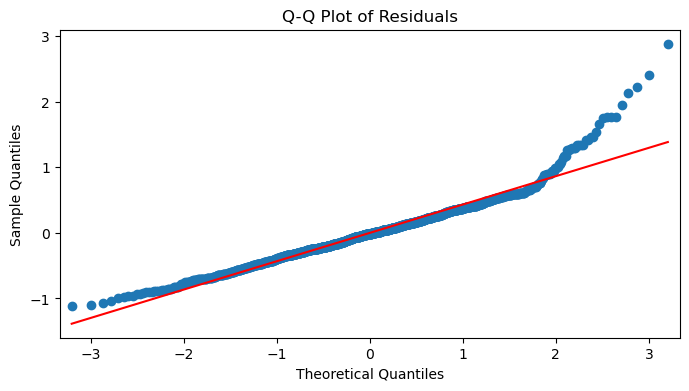

Anderson-Darling Statistic: 6.821563900072306
Critical Values: [0.574 0.654 0.785 0.916 1.089]
Significance Levels: [15.  10.   5.   2.5  1. ]


In [17]:
residuals = model.resid

# Create a Q-Q plot to check for normality
fig, ax = plt.subplots(figsize=(8, 4))
sm.qqplot(residuals, line='s', ax=ax)
plt.title("Q-Q Plot of Residuals")
plt.show()



# Perform the Anderson-Darling test for normality
result = stats.anderson(residuals, dist='norm')

# Extract the test statistic, critical values, and significance levels
ad_statistic = result.statistic
ad_critical_values = result.critical_values
ad_significance_levels = result.significance_level

print("Anderson-Darling Statistic:", ad_statistic)
print("Critical Values:", ad_critical_values)
print("Significance Levels:", ad_significance_levels)


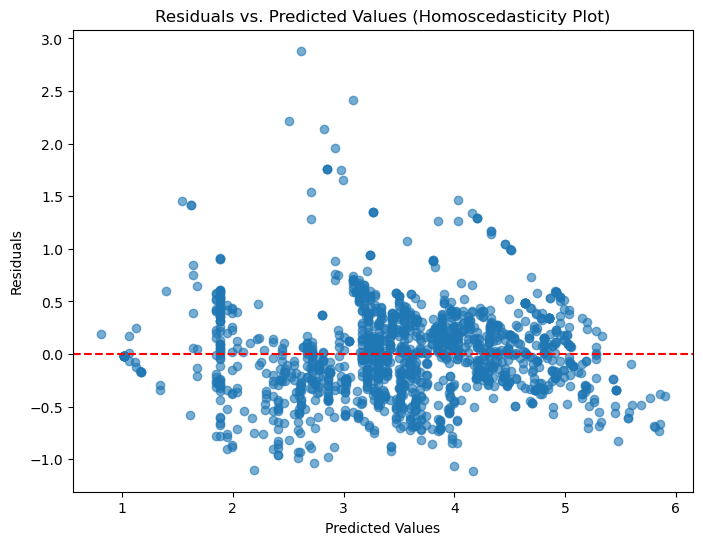

In [18]:
# Get the predicted (fitted) values from the model
predicted_values = model.fittedvalues

# Get the residuals from the model
residuals = model.resid

# Create a scatterplot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle= '--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Homoscedasticity Plot)")
plt.show()

### Task 5: Discussion and Conclusion (10 marks)